In [1]:
def indexer():
    import re
    import datetime
    target = re.compile(r"[^\w\s]|\s")
    return target.sub('',str(datetime.datetime.now()))
indexer()

'20230404134951493206'

In [2]:
import numpy
import matplotlib.pyplot
from IPython import display

In [3]:
# Experiments
# the function
x = numpy.linspace(-2*numpy.pi,2*numpy.pi,400)
fx = numpy.sin(x) * numpy.exp(-x**2*0.05)

#derivative
df = numpy.cos(x)*numpy.exp(-x**2*.05)+numpy.sin(x)*(-.1*x)*numpy.exp(-x**2*.05)

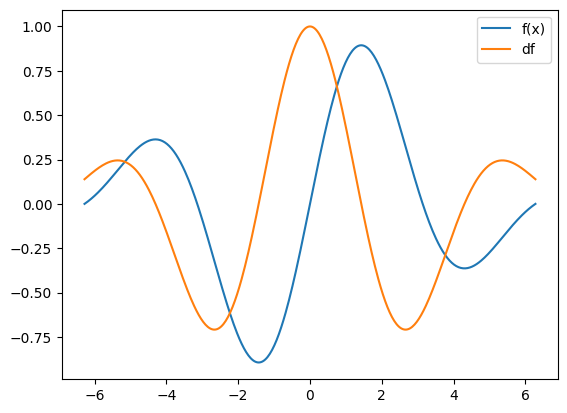

In [6]:
matplotlib.pyplot.plot(x,fx,x,df)
matplotlib.pyplot.legend(['f(x)','df']);

In [7]:
# python function
def fx(x):
    return numpy.sin(x) * numpy.exp(-x**2*0.05)

def deriv(x):
    return numpy.cos(x)*numpy.exp(-x**2*.05)+numpy.sin(x)*(-.1*x)*numpy.exp(-x**2*.05)

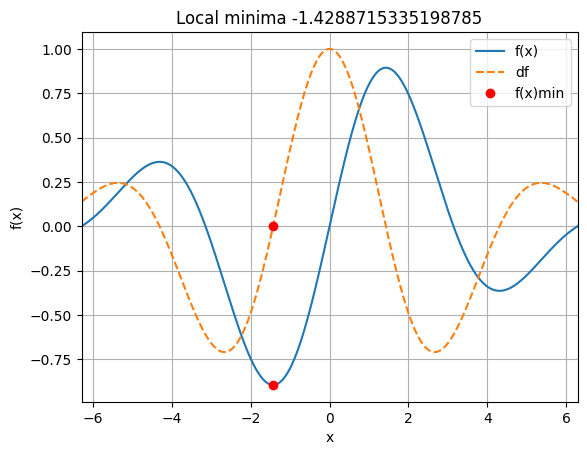

In [11]:
localmin = numpy.random.choice(x,1)

learning_rate = 0.01
training_epochs = 1000

for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad
    
matplotlib.pyplot.plot(x,fx(x),x,deriv(x),'--')
matplotlib.pyplot.plot(localmin,deriv(localmin),'ro')
matplotlib.pyplot.plot(localmin,fx(localmin),'ro')

matplotlib.pyplot.xlim(x[[0,-1]])
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('x')
matplotlib.pyplot.ylabel("f(x)")
matplotlib.pyplot.legend(['f(x)','df','f(x)min',])
matplotlib.pyplot.title('Local minima %s' %localmin[0])
matplotlib.pyplot.show()

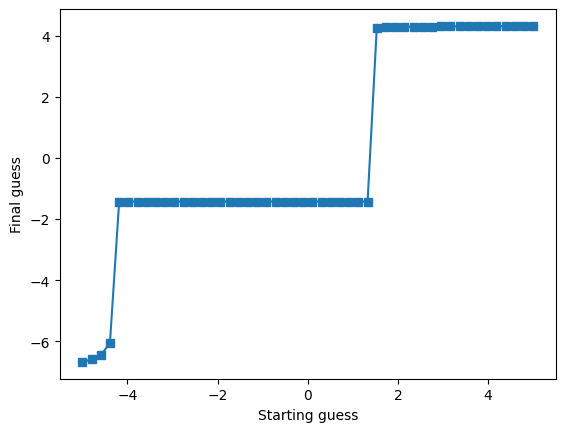

In [15]:
# parametric experiments

starting_locations = numpy.linspace(-5,5,50)
finalres = numpy.zeros(len(starting_locations))

for idx,localmin in enumerate(starting_locations):
    
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learning_rate*grad
    
    finalres[idx] = localmin

matplotlib.pyplot.plot(starting_locations,finalres,'s-')
matplotlib.pyplot.xlabel('Starting guess')
matplotlib.pyplot.ylabel("Final guess");

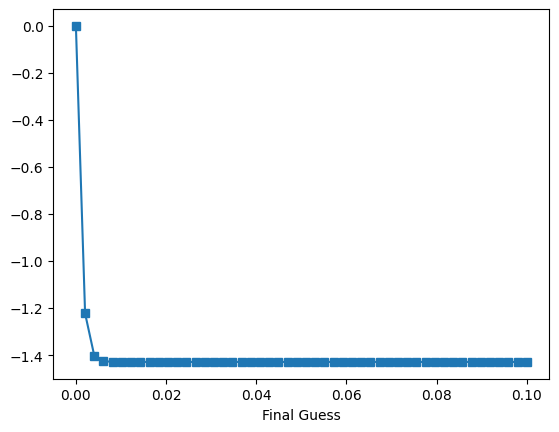

In [20]:
# Experiment 2: with different learning rate

learning_rate = numpy.linspace(1e-10,1e-1,50)
finalres = numpy.zeros(len(learning_rate))

for idx, learningRate in enumerate(learning_rate):
    localmin = 0
    
    for i in range(training_epochs):
        grad = deriv(localmin)
        localmin = localmin - learningRate*grad
        
    finalres[idx] = localmin
    
matplotlib.pyplot.plot(learning_rate,finalres,'s-')
matplotlib.pyplot.xlabel("Learning Rate")
matplotlib.pyplot.xlabel("Final Guess")
matplotlib.pyplot.show()

In [35]:
# experiment 3

# setup parameters
learning_rate = numpy.linspace(1e-10,1e-1,50)
training_epcohs = numpy.round(numpy.linspace(10,500,40))

# a matrix to store resutls
finalres = numpy.zeros((len(learning_rate),len(training_epcohs)))

# loop over learning rate
for Lidx, learningRate in enumerate(learning_rate):
    
    for Eidx, trainEpochs in enumerate(training_epcohs):
        
        # local min
        localmin = 0
        for i in range(int(trainEpochs)):
            grad = deriv(localmin)
            localmin = localmin- learningRate*grad
            
        finalres[Lidx,Eidx] = localmin
        

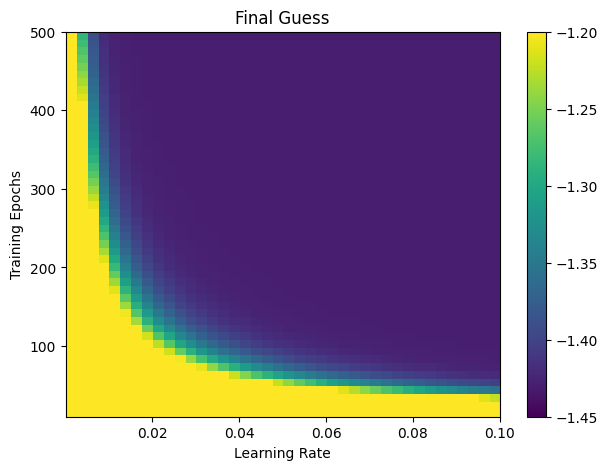

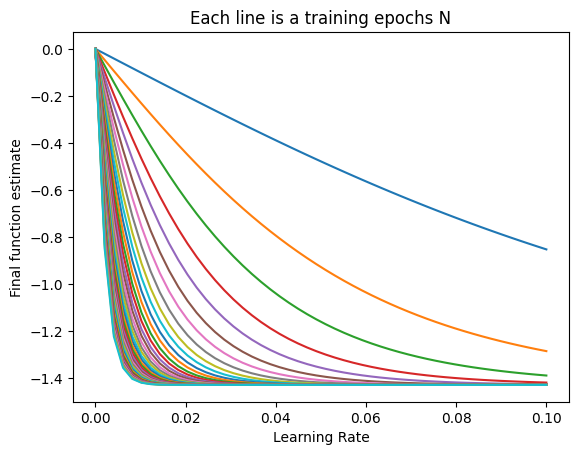

In [36]:
fig,ax = matplotlib.pyplot.subplots(figsize=(7,5))

matplotlib.pyplot.imshow(finalres,extent=[learning_rate[0],learning_rate[-1],training_epcohs[0],training_epcohs[-1]],aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
matplotlib.pyplot.xlabel('Learning Rate')
matplotlib.pyplot.ylabel('Training Epochs')
matplotlib.pyplot.title("Final Guess")
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()

matplotlib.pyplot.plot(learning_rate,finalres)
matplotlib.pyplot.xlabel("Learning Rate")
matplotlib.pyplot.ylabel("Final function estimate")
matplotlib.pyplot.title("Each line is a training epochs N")
matplotlib.pyplot.show()